<a href="https://colab.research.google.com/github/yeekha89/Assignment-Submmissions/blob/main/Homework6_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Import libraries for Bar Chart Word Frequency
from pathlib import Path
from textblob import TextBlob
!pip install requests
import requests

In [39]:
# Get text from url
url = "http://www.gutenberg.org/files/2265/2265.txt"
response = requests.get(url)
data = response.text
blob = TextBlob(data)

In [40]:
# Import NLTK
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = stopwords.words('english')
items = blob.word_counts.items()
items = [item for item in items if item[0] not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [41]:
# Get and sort top 20 in descending order
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)
top20 = sorted_items[0:20]
import pandas as pd
df = pd.DataFrame(top20, columns=['word', 'count'])
df

,word,count
0,ham,337
1,lord,211
2,haue,175
3,king,173
4,shall,107
5,hamlet,106
6,come,106
7,thou,105
8,let,104
9,good,99


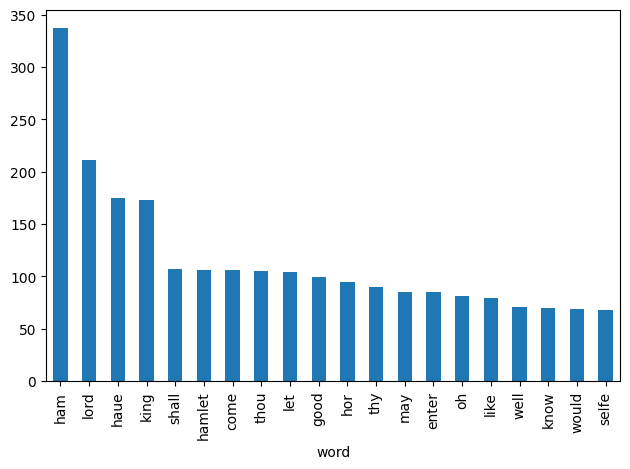

In [42]:
# Bar plot visualization
axes = df.plot.bar(x='word', y='count', legend=False)
import matplotlib.pyplot as plt
plt.gcf().tight_layout()
plt.show()

In [43]:
# Import libraries for Word Cloud
import imageio
image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image =imageio.v3.imread(image_file)

In [44]:
# Configure WordCloud object
from wordcloud import WordCloud

wordcloud = WordCloud(colormap='prism', mask=mask_image,
                      background_color='white')
import requests
target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text
wordcloud = wordcloud.generate(data) # Generate the Word Cloud
wordcloud = wordcloud.to_file('mask_oval.png')

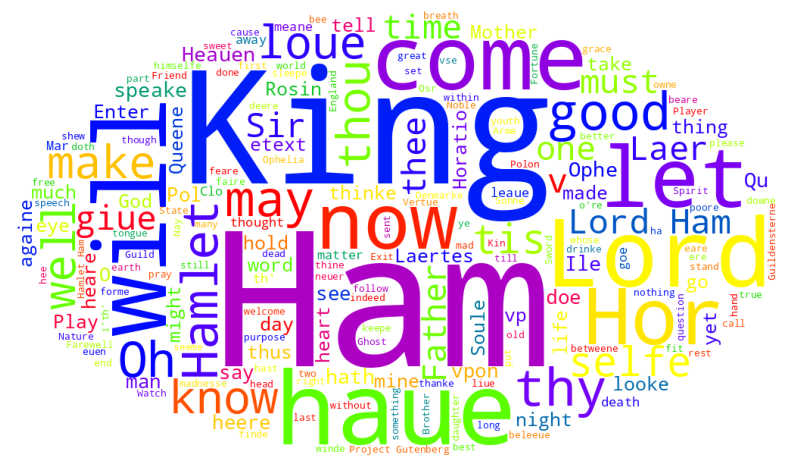

In [45]:
# Visualize Word Cloud Mask
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('mask_oval.png')

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()